In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tabulate import tabulate

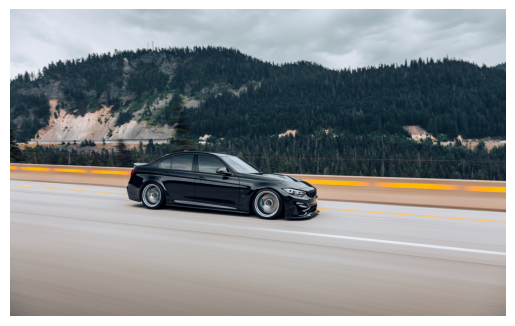

In [2]:
jpg_img = mpimg.imread('D:/SEM4/ADA/1.jpg')


plt.imshow(jpg_img)
plt.axis('off')  # Hide axes
plt.show()



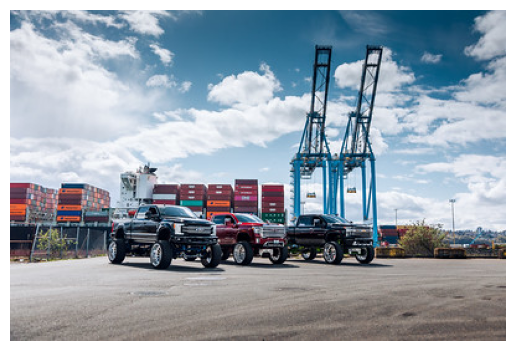

In [3]:
png_img = mpimg.imread('D:/SEM4/ADA/2.png')


plt.imshow(png_img)
plt.axis('off')  # Hide axes
plt.show()



## **COMPRESSION USING LOSSLESS AND LOSSY**

### JPEG image

In [4]:
cv2.imwrite('comp_image1.png', jpg_img, [cv2.IMWRITE_PNG_COMPRESSION, 3])
cv2.imwrite("comp_image2.jpg", jpg_img, [cv2.IMWRITE_JPEG_QUALITY, 50])

True

In [5]:
image_lossless = cv2.imread('comp_image1.png')
image_lossy = cv2.imread('comp_image2.jpg')

In [6]:
orginal_size = os.path.getsize('1.jpg')
print(f'Orginal Size : {orginal_size/1024:.2f}KB')

Orginal Size : 9889.67KB


In [7]:
lossless_size = os.path.getsize('comp_image1.png')
print(f'Lossless Compressed Size : {lossless_size/1024:.2f}KB')

Lossless Compressed Size : 24775.04KB


In [8]:
lossy_size = os.path.getsize('comp_image2.jpg')
print(f'Lossy Compressed Size : {lossy_size/1024:.2f}KB')

Lossy Compressed Size : 1075.77KB


### PnG image

In [9]:
cv2.imwrite('comp_image3.png', png_img, [cv2.IMWRITE_PNG_COMPRESSION, 3])
cv2.imwrite("comp_image4.jpg", png_img, [cv2.IMWRITE_JPEG_QUALITY, 50])

True

In [10]:
orginal_size2 = os.path.getsize('2.png')
print(f'Orginal Size : {orginal_size2/1024:.2f}KB')

Orginal Size : 177.89KB


In [11]:
lossless_size2 = os.path.getsize('comp_image3.png')
print(f'Lossless Compressed Size : {lossless_size2/1024:.2f}KB')

Lossless Compressed Size : 19.42KB


In [12]:
lossy_size2 = os.path.getsize('comp_image4.jpg')
print(f'Lossy Compressed Size : {lossy_size/1024:.2f}KB')

Lossy Compressed Size : 1075.77KB


In [13]:
data = [
    ["Image Details", "Original Size", "Lossless (comp_image1.png)", "Lossy (comp_image2.jpg)"],
    ["JPG Image",f"{orginal_size/1024:.2f} KB", f"{lossless_size/1024:.2f} KB", f"{lossy_size/1024:.2f} KB"],
    ["PNG Image",f"{orginal_size2/1024:.2f} KB", f"{lossless_size2/1024:.2f} KB", f"{lossy_size2/1024:.2f} KB"]
]

print(tabulate(data, headers="firstrow", tablefmt="grid"))


+-----------------+-----------------+------------------------------+---------------------------+
| Image Details   | Original Size   | Lossless (comp_image1.png)   | Lossy (comp_image2.jpg)   |
+=================+=================+==============================+===========================+
| JPG Image       | 9889.67 KB      | 24775.04 KB                  | 1075.77 KB                |
+-----------------+-----------------+------------------------------+---------------------------+
| PNG Image       | 177.89 KB       | 19.42 KB                     | 2.27 KB                   |
+-----------------+-----------------+------------------------------+---------------------------+


## **Compression Ratio and Bitrate**

- CR - Higher compression ratio indicates greater file size reduction 
        
        CR = Original Size / Compressed Size
- BR - Lower bitrate indicates loss of quality in the image and indicates more aggressive compression 
        
         BR = Compression Ratio / Compression Time

In [14]:
compute_cr_lossless = orginal_size/lossless_size
compute_cr_lossy = orginal_size/lossy_size

num_pixels = jpg_img.shape[0] *jpg_img.shape[1]

compute_bitrate_lossless = (lossless_size*8) / num_pixels
compute_bitrate_lossy = (lossy_size*8) / num_pixels

print(f'Compression Ratio for Lossless Compression : {compute_cr_lossless:.2f}')
print(f'Compression Ratio for Lossy Compression : {compute_cr_lossy:.2f}')
print(f'Bitrate for Lossless Compression : {compute_bitrate_lossless:.2f}')
print(f'Bitrate for Lossy Compression : {compute_bitrate_lossy:.2f}')

Compression Ratio for Lossless Compression : 0.40
Compression Ratio for Lossy Compression : 9.19
Bitrate for Lossless Compression : 7.27
Bitrate for Lossy Compression : 0.32


## Peak Signal to Noise Ratio (PSNR)

It is a measure of the peak error betweeen the orginal and compressed image it is calculated using the mean squared error.


In [15]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

In [16]:
psnr_lossless = psnr(jpg_img, image_lossless)
psnr_lossy = psnr(jpg_img, image_lossy)

print(f'PSNR Lossless : {psnr_lossless:.2f}')
print(f'PSNR lossy : {psnr_lossy:.2f}')

c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


PSNR Lossless : inf
PSNR lossy : 39.56


## Structural Similarity Index(SSIM)

- SSIM measures the similarity between two images by comparing their luminance, contrast, and structure. It is a more robust measure than MSE and PSNR as it takes into account the human visual perception of images. 

     The formula for SSIM is as follows:

        SSIM(x, y) = (2 * μx * μy + c1) * (2 * σxy + c2) / ((μx^2 + μy^2 + c1) * (σx^2 + σy^2 + c2))
        
        where: μx and μy are the mean of x and y, respectively


- SSIM value ranges from -1 to 1, where 1 indicates perfect similarity and -1 indicates perfect dissimilarity.

In [ ]:
ssim_lossless = ssim(jpg_img, image_lossless, multichannel = True)